In [1]:
#import modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys
import h5py
import tensorflow.compat.v1 as tf
import tensorflow as tf2

from DlModels import DlModels
from TrainDL import TrainDL
from DataLoader import DataLoader

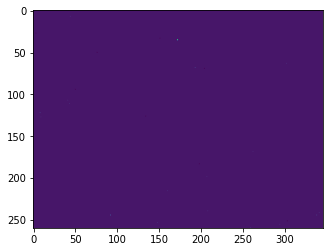

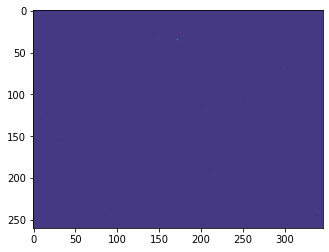

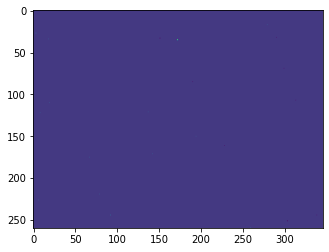

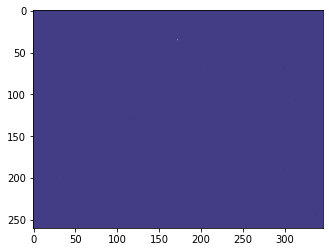

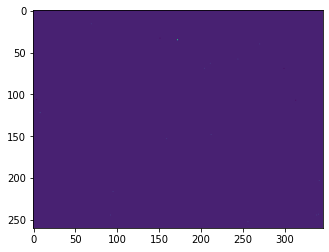

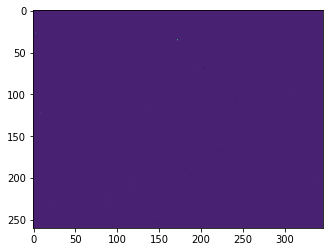

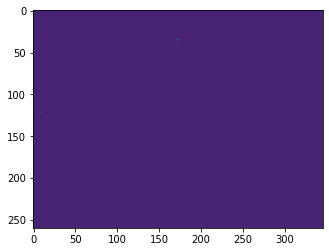

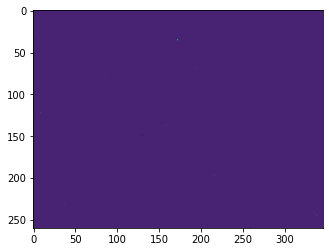

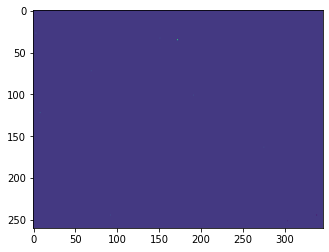

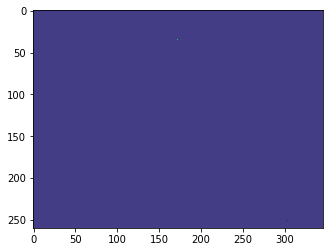

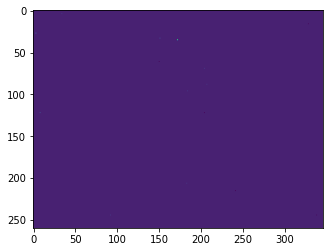

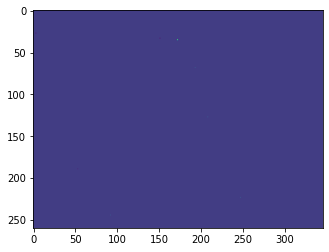

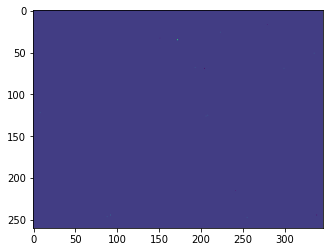

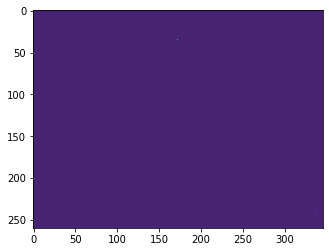

KeyboardInterrupt: 

In [4]:
data_loader = DataLoader('17_point_single_frame_processed_data_10_Hz.hdf5')
%matplotlib inline  
i=0
obj = []
for image, output in data_loader.load_all():
    if i==0:
        obj = plt.imshow(image[:,:,0])
    else:
        obj.set_data(image)
    plt.show()


In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
tf.config.list_physical_devices('GPU')
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.keras.backend.set_floatx('float32') #for memory use

In [2]:
#import modules
epochs = 30
batch_size = 100
base_learning_rate = 0.001
learning_decay_rate = 10
learning_decay_factor = 0.5
data_loader = DataLoader('17_point_single_frame_processed_data_10_Hz.hdf5')
data_loader.divide_data()

tf.compat.v1.disable_eager_execution()
input_image = tf.placeholder(tf.float32, [None, None, None, None, 1], name='input_image')
initial_hidden_state = tf.placeholder(tf.float32, [None, 29, 39, 20], name='initial_hidden_state')
initial_carry_state = tf.placeholder(tf.float32, [None, 29, 39, 20], name='initial_carry_state')
#grount_truth = tf.placeholder(tf.float32, [None, None, 18])
grount_truth = tf.placeholder(tf.float32, [None, None, 18])
learning_rate = tf.placeholder(tf.float32, shape=(), name='learning_rate')

sess = tf.Session()

# Build NN using load_vgg, layers, and optimize function
#nn_last_layer, hidden_state, carry_state = DlModels.Conv2dx2LSTMFC(input_image, initial_hidden_state, initial_carry_state, encoder=DlModels.Conv2Dx1, N_outputs=18)
nn_last_layer, hidden_state, carry_state = DlModels.Conv2dx2LSTMFC_sequence(input_image, initial_hidden_state, initial_carry_state, encoder=DlModels.Conv2Dx1, N_outputs=18)

#train_op, loss = TrainDL.SoftEntropy(nn_last_layer, grount_truth, learning_rate)
train_op, loss = TrainDL.SoftEntropy(nn_last_layer, grount_truth, learning_rate)

#accuracy
correct_prediction = tf.equal(tf.argmax(nn_last_layer[:,-1,:], 1), tf.argmax(grount_truth[:,-1,:], 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy_operation')



/home/kucarst3-dlws/Desktop/Ayyad/DVSContactEstimation/DataLoader.py:11: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  self.data_ = h5py.File(filename)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
# Train NN using the train_nn function
TrainDL.train_nn(sess, epochs, nn_last_layer, hidden_state, carry_state, batch_size, data_loader, accuracy_op, train_op, loss, input_image, grount_truth, initial_hidden_state, initial_carry_state, learning_rate, base_learning_rate, learning_decay_rate, learning_decay_factor)
        
# save trained model
saver = tf.train.Saver()
saver.save(sess, './model')

Training...

EPOCH 1 ...
Train Accuracy 0.04249999951571226 ...
Validation Accuracy [0.05] ...
EPOCH 2 ...
Train Accuracy 0.042499999050050974 ...
Validation Accuracy [0.05] ...
EPOCH 3 ...
Train Accuracy 0.1216666679829359 ...
Validation Accuracy [0.0875] ...
EPOCH 4 ...
Train Accuracy 0.16416666842997074 ...
Validation Accuracy [0.225] ...
EPOCH 5 ...
Train Accuracy 0.3241666704416275 ...
Validation Accuracy [0.25] ...
EPOCH 6 ...
Train Accuracy 0.3941666707396507 ...
Validation Accuracy [0.325] ...
EPOCH 7 ...
Train Accuracy 0.27500000409781933 ...
Validation Accuracy [0.075] ...
EPOCH 8 ...
Train Accuracy 0.4866666793823242 ...
Validation Accuracy [0.375] ...
EPOCH 9 ...
Train Accuracy 0.4508333280682564 ...
Validation Accuracy [0.375] ...
EPOCH 10 ...
Train Accuracy 0.7099999934434891 ...
Validation Accuracy [0.4875] ...
EPOCH 11 ...
Train Accuracy 0.7050000131130219 ...
Validation Accuracy [0.475] ...
EPOCH 12 ...
Train Accuracy 0.7491666674613953 ...
Validation Accuracy [0.55] .

'./model'

In [2]:
sess = tf.Session()
tf.disable_eager_execution()
saver = tf.train.import_meta_graph('./model.meta')
[n.name for n in tf.get_default_graph().as_graph_def().node]
g = tf.train.latest_checkpoint('./')
saver.restore(sess, tf.train.latest_checkpoint('./')) 

INFO:tensorflow:Restoring parameters from ./model


In [3]:
data_loader = DataLoader('17_point_single_frame_processed_data_10_Hz.hdf5')
data_loader.divide_data()
x_train, y_train, test_size = data_loader.get_test_data_sequence()
initial_state_value = np.zeros(shape=(test_size, 29, 39, 20), dtype=float)
test_accuracy = sess.run([accuracy_op],
                    feed_dict={input_image: x_train, grount_truth: y_train, initial_hidden_state: initial_state_value, initial_carry_state: initial_state_value})
print(test_accuracy)

/home/kucarst3-dlws/Desktop/Ayyad/DVSContactEstimation/DataLoader.py:11: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  self.data_ = h5py.File(filename)


NameError: name 'accuracy_op' is not defined

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


/home/kucarst3-dlws/anaconda3/envs/ayyad_tf/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/home/kucarst3-dlws/anaconda3/envs/ayyad_tf/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/home/kucarst3-dlws/anaconda3/envs/ayyad_tf/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/home/kucarst3-dlws/anaconda3/envs/ayyad_tf/lib/python3.6/site-pack

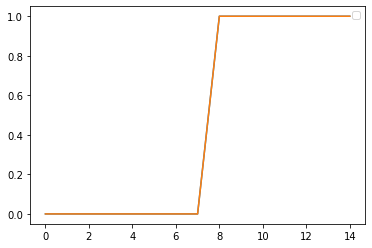

In [28]:
#Test step by step
z = []
idx = 30

x_train, y_train, test_size = data_loader.get_test_data_sequence()
final_hidden_state = []
final_carry_state = []
for i in range(len(x_train[idx])):
    if i==0:        
        initial_hidden_state_value = np.zeros(shape=(1, 29, 39, 20), dtype=float)
        initial_carry_state_value = np.zeros(shape=(1, 29, 39, 20), dtype=float)
    else:
        initial_hidden_state_value = final_hidden_state
        initial_carry_state_value = final_carry_state
    last_layer, final_hidden_state, final_carry_state = sess.run([nn_last_layer, hidden_state, carry_state], 
                                feed_dict={input_image: [[x_train[idx][i]]], initial_hidden_state: initial_hidden_state_value, initial_carry_state: initial_carry_state_value})
    g = np.argmax(last_layer.reshape(-1), 0)    
    z.append(g)
    
print(np.argmax(y_train[idx, :, :], axis=1))
plt.plot(np.argmax(y_train[idx, :, :], axis=1))
plt.plot(z)
plt.legend('true', 'lstm')
plt.show()
    
    

In [ ]:
plt.imshow(x_train[idx][0])

In [14]:
print(g.eval())

ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

In [5]:
x = tf2.ones(shape=(5, 3, 5))
print(tf.shape(x))
print(tf.shape(x[:,-1,:]))

tf.Tensor([5 3 5], shape=(3,), dtype=int32)
tf.Tensor([5 5], shape=(2,), dtype=int32)
